# Lab 1: Image Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
%cd '/content/drive/My Drive/ComputerVisionTasks/Lab1'

/content/drive/My Drive/ComputerVisionTasks/Lab1


### Task 1: Preprocessing and Data Augmentation

* **STEP 1:** Import required libraries

In [47]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.applications import VGG19
from keras.applications import VGG16, EfficientNetB7, NASNetMobile, MobileNetV2
from PIL import Image
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [31]:
# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 5

In [32]:
train_folder = '/content/drive/MyDrive/ComputerVisionTasks/Lab1/FlowersDataset/train'
test_folder = '/content/drive/MyDrive/ComputerVisionTasks/Lab1/FlowersDataset/test'

In [33]:
import os

In [34]:
# Load image data
def load_train_data(folder_path):
    X = []
    y = []
    class_names = os.listdir(folder_path)
    print(class_names)

    for i, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)
            X.append(image)
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y


In [35]:
# Load image data
def load_test_data(folder_path):
    X = []
    filenames = []
    for image_name in os.listdir(folder_path):
        if image_name.endswith('.jpg'):
            image_path = os.path.join(folder_path, image_name)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)
            X.append(image)
            filenames.append(image_name)
    X = np.array(X)
    return X, filenames

In [38]:
X_train, y_train = load_train_data(train_folder)
X_test, test_filenames = load_test_data(test_folder)

['dandelion', 'daisy', 'rose', 'sunflower', 'tulip']


In [55]:
X_train.shape

(624, 224, 224, 3)

### Displaying some samples of training

In [39]:
def display_sample_images(folder_path, class_names, num_samples=3):
    plt.figure(figsize=(10, 6))
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        image_names = os.listdir(class_path)[:num_samples]
        for j, image_name in enumerate(image_names):
            image_path = os.path.join(class_path, image_name)
            image = Image.open(image_path)
            plt.subplot(len(class_names), num_samples, i * num_samples + j + 1)
            plt.imshow(image)
            plt.title(class_name)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

In [40]:
# Get class names
train_class_names = os.listdir(train_folder)


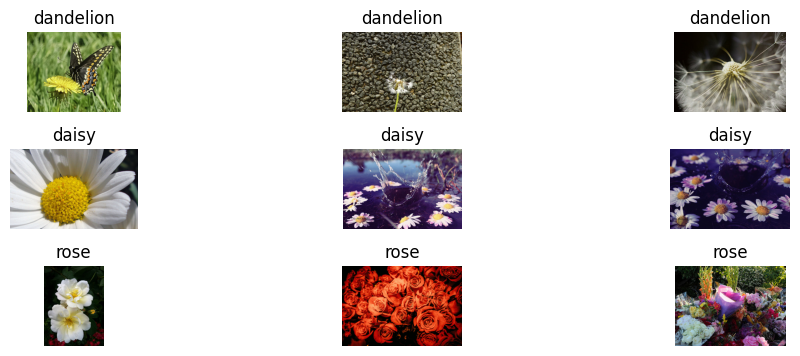

In [43]:
# Display sample images
display_sample_images(train_folder, train_class_names)

In [44]:
# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [45]:
import tensorflow_hub as hub

pretrained_layer = Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4" , input_shape = (224,224,3))
])

model = Sequential([
    pretrained_layer ,
    Dense(5,activation = 'softmax')
])

In [48]:
# Model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
checkpoint = ModelCheckpoint('flower_mobilenet_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val), callbacks=[checkpoint])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 1.0707 - accuracy: 0.6074
Epoch 1: val_loss improved from inf to 0.49612, saving model to flower_mobilenet_model.h5
20/20 [==============================] - 38s 2s/step - loss: 1.0707 - accuracy: 0.6074 - val_loss: 0.4961 - val_accuracy: 0.8333
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.3824 - accuracy: 0.8590
Epo

In [49]:
model.evaluate(X_val,y_val)

5/5 [==============================] - 7s 1s/step - loss: 0.2028 - accuracy: 0.9167


[0.20284977555274963, 0.9166666865348816]

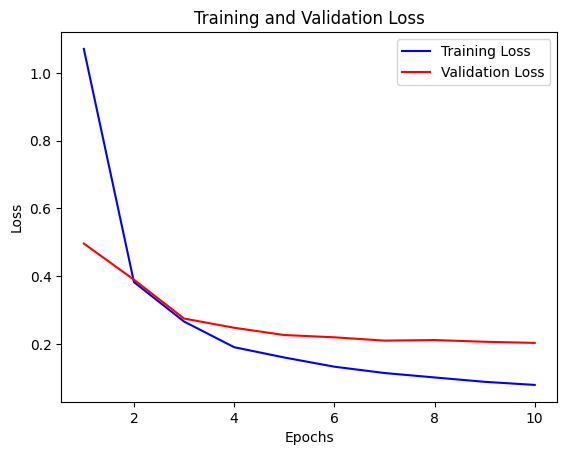

In [50]:
# Extract training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation loss
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b-', label='Training Loss')  # Change 'bo' to 'b-'
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

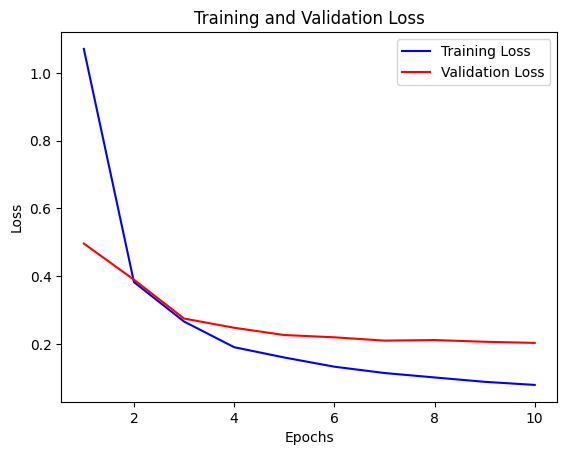

In [51]:
# Extract training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation loss
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b-', label='Training Loss')  # Change 'bo' to 'b-'
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

29/29 [==============================] - 35s 1s/step


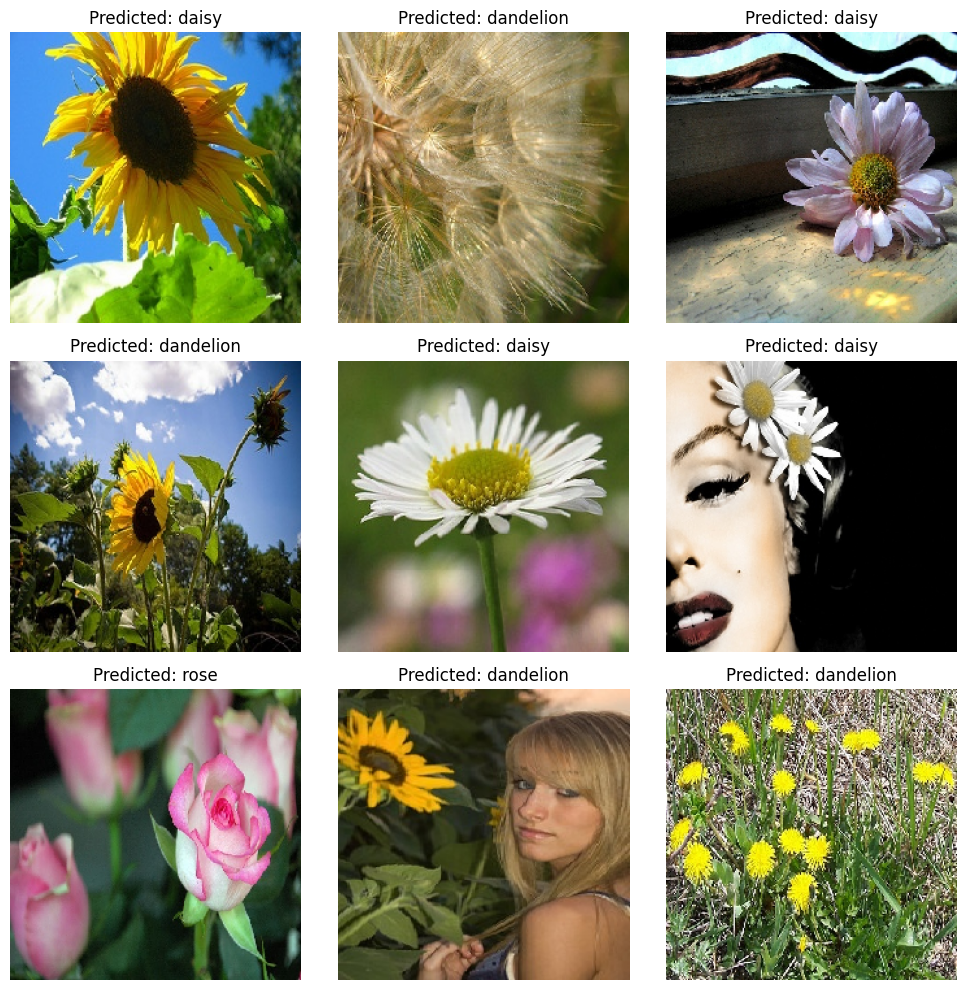

In [52]:
# Predict class names for test data
test_predictions = model.predict(X_test)
class_names = os.listdir(train_folder)
class_to_index = {class_name: i for i, class_name in enumerate(class_names)}
index_to_class = {i: class_name for i, class_name in enumerate(class_names)}
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_predictions_class_names = [index_to_class[idx] for idx in test_predictions_classes]

# Plot some images with predicted classes
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i])
    plt.title("Predicted: {}".format(test_predictions_class_names[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()

5/5 [==============================] - 9s 2s/step


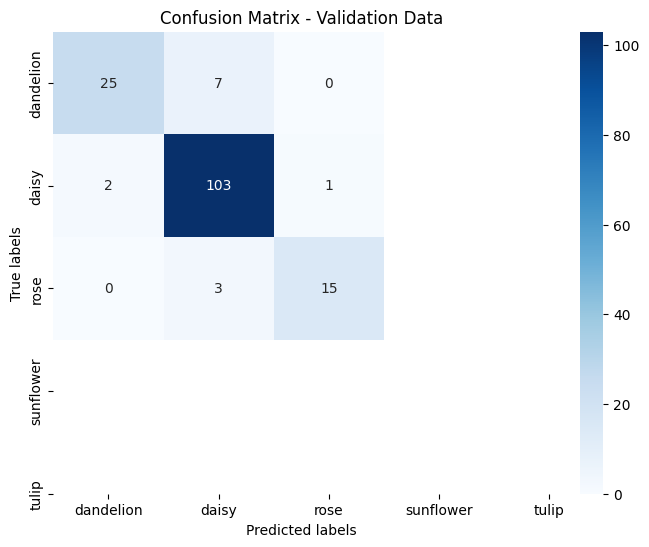

In [56]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get true labels and predicted labels for validation data
y_true_val = y_val
y_pred_val = np.array([np.argmax(pred) for pred in model.predict(X_val)])

# Compute confusion matrix
conf_mat_val = confusion_matrix(y_true_val, y_pred_val)

# Plot confusion matrix for validation data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_val, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Validation Data')
plt.show()

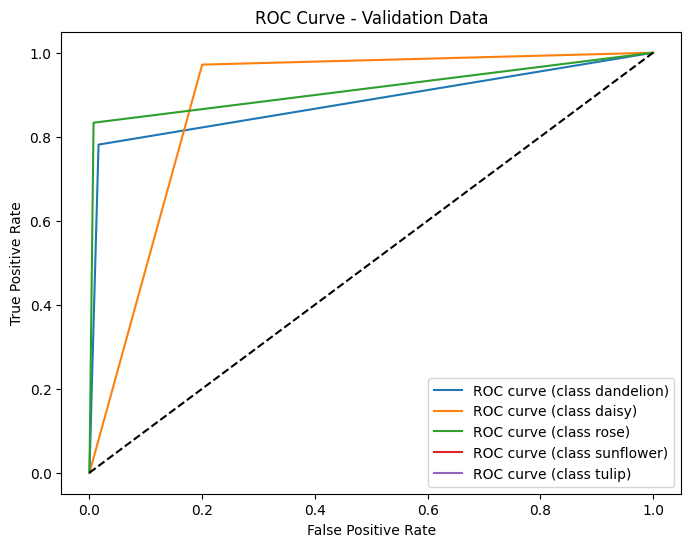

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for validation data
fpr_val = dict()
tpr_val = dict()
roc_auc_val = dict()
for i in range(NUM_CLASSES):
    fpr_val[i], tpr_val[i], _ = roc_curve((y_true_val == i).astype(int), (y_pred_val == i).astype(int))
    roc_auc_val[i] = auc(fpr_val[i], tpr_val[i])

# Plot ROC curve for validation data
plt.figure(figsize=(8, 6))
for i in range(NUM_CLASSES):
    plt.plot(fpr_val[i], tpr_val[i], label='ROC curve (class {})'.format(class_names[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Data')
plt.legend(loc="lower right")
plt.show()

In [59]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:\n", classification_report(y_true_val, y_pred_val, target_names=class_names))

ValueError: Number of classes, 3, does not match size of target_names, 5. Try specifying the labels parameter

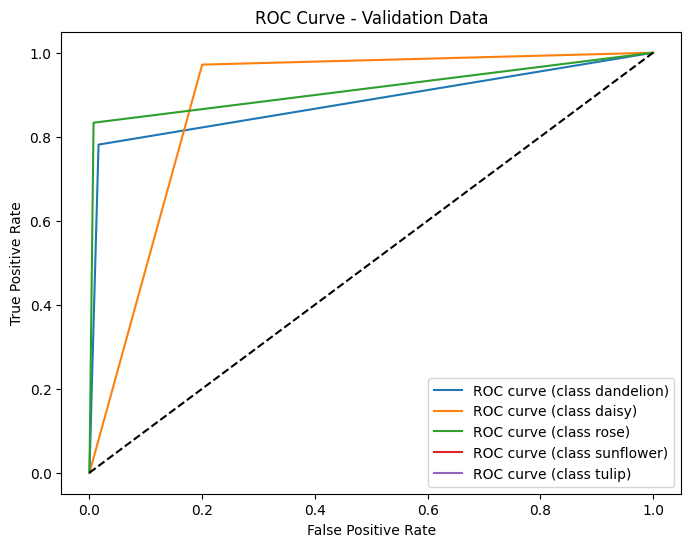

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for validation data
fpr_val = dict()
tpr_val = dict()
roc_auc_val = dict()
for i in range(NUM_CLASSES):
    fpr_val[i], tpr_val[i], _ = roc_curve((y_true_val == i).astype(int), (y_pred_val == i).astype(int))
    roc_auc_val[i] = auc(fpr_val[i], tpr_val[i])

# Plot ROC curve for validation data
plt.figure(figsize=(8, 6))
for i in range(NUM_CLASSES):
    plt.plot(fpr_val[i], tpr_val[i], label='ROC curve (class {})'.format(class_names[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Data')
plt.legend(loc="lower right")
plt.show()